### Sentiment Analysis of Airline data using XG-Boost Classifier

#### Load Data
- Preprocess Text
- Exploratory Analysis
- Feature Selection
- Clean Text
- Tokenize
- Split data to train and test set

#### Model Design
- XGBClassifier
- Train Model

#### Model Analysis
- Evalute Train Set
- Evaluate Test Set
- Visual Display
1. Classification Report
2. confusion Matrix

#### Make prediction using the trained model

In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

#### Load Data
- Preprocess Text

In [2]:
data = pd.read_csv('Tweets.csv')

data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


#### Exploratory Analysis

In [3]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


<AxesSubplot:ylabel='airline'>

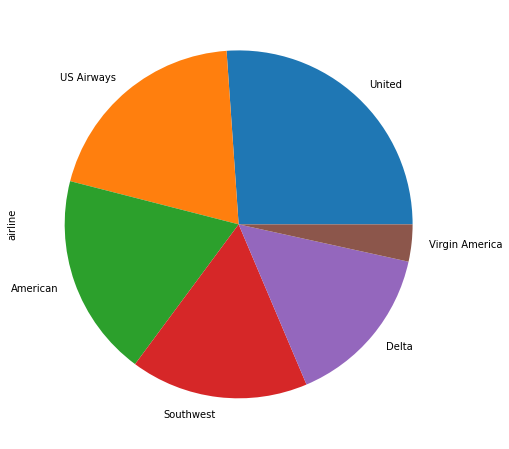

In [4]:
data.airline.value_counts().plot(kind='pie', figsize=(8,8))


<AxesSubplot:ylabel='airline_sentiment'>

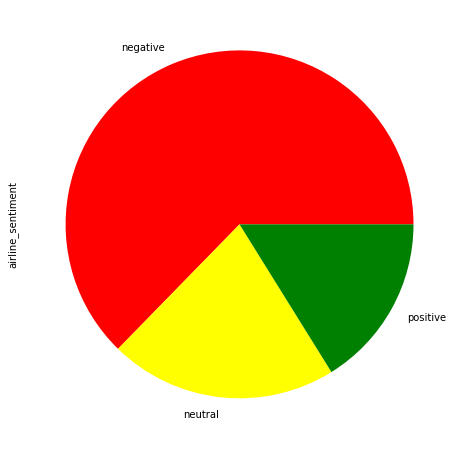

In [5]:
data.airline_sentiment.value_counts().plot(kind='pie', figsize=(8,8), colors=["red", "yellow", "green"])


<AxesSubplot:xlabel='airline'>

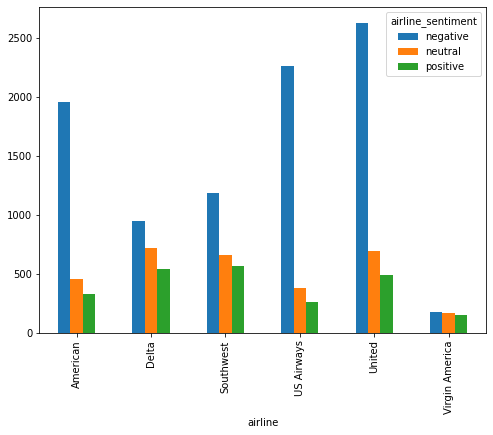

In [6]:
airline_sentiment = data.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()

airline_sentiment.plot(kind='bar')

<AxesSubplot:xlabel='airline_sentiment', ylabel='airline_sentiment_confidence'>

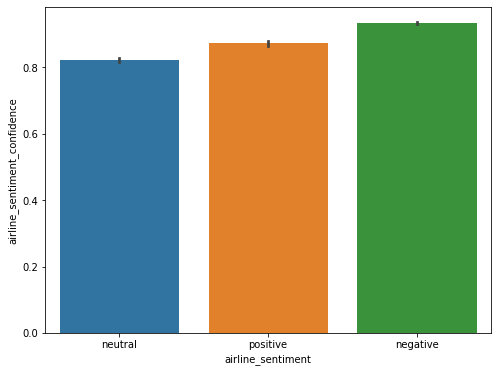

In [7]:
import seaborn as sns

sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=data)

#### Feature Selection

In [8]:
features = data.iloc[:, 10].values
labels = data.iloc[:, 1].values

#### Clean Text

In [9]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

#### Tokenize

In [10]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
vectorizer = TfidfVectorizer(stop_words='english')

processed_features = vectorizer.fit_transform(processed_features).toarray()

#### Split data to train and test set

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

#### Model Design
- XGBClassifier

In [13]:
from xgboost import XGBClassifier

#### Train Model

In [14]:
model = XGBClassifier()
model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Model Analysis
- Evalute Train Set

In [15]:
predictions = model.predict(X_test)

#### Evaluate Test Set

In [16]:
from sklearn import metrics

print('Accuracy Score:', metrics.accuracy_score(y_test, predictions))  
print('')
print('Precision Score:', metrics.precision_score(y_test, predictions, average='macro'))  
print('')
print('Recall Score:', metrics.recall_score(y_test, predictions, average='macro'))
print('')
print('F1 Score:', metrics.f1_score(y_test, predictions, average='macro'))

Accuracy Score: 0.7558060109289617

Precision Score: 0.7093047098856949

Recall Score: 0.628389185402023

F1 Score: 0.6561488157495393


#### Visual Display
1. Classification Report

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[1718  101   51]
 [ 337  238   39]
 [ 130   57  257]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.39      0.47       614
    positive       0.74      0.58      0.65       444

    accuracy                           0.76      2928
   macro avg       0.71      0.63      0.66      2928
weighted avg       0.74      0.76      0.74      2928

0.7558060109289617


#### confusion Matrix

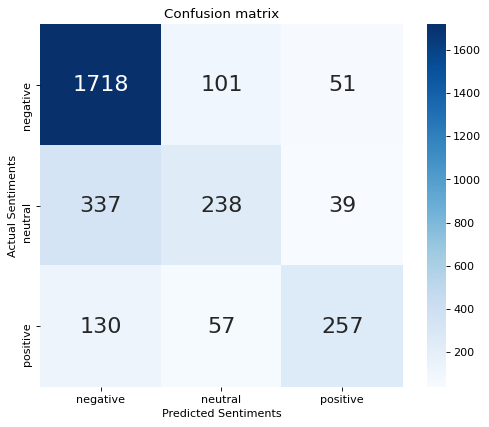

In [22]:
def show_graph(data, pred):
    confusion = confusion_matrix(data, pred)

    plt.figure(dpi=80)
    sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
                xticklabels=['negative', 'neutral','positive'],
                yticklabels=['negative', 'neutral','positive'],
                fmt='d', annot_kws={'fontsize':20})

    plt.xticks(rotation=0)
    plt.title('Confusion matrix')
    plt.xlabel('Predicted Sentiments')
    plt.ylabel('Actual Sentiments')
    plt.show()
    
    
show_graph(y_test, predictions)

#### Make prediction using the trained model

In [19]:
text = ['This movie was very good and excellent', 
        'Absolutely a joy ride, I am happy', 
        'Steven Seagal was terrible', 
        'I fell asleep halfway through', 
        'I cannot recommend this highly enough', 
        'Steven Seagal was amazingly good, his performance was Oscar-worthy and great.']


reviews = vectorizer.transform(text)         

In [20]:
pred = model.predict(reviews)

pred

array(['positive', 'negative', 'negative', 'negative', 'negative',
       'positive'], dtype=object)

In [21]:
for review, category in zip(text, pred):
    print('{}         ======>   {}'.format(review, category))
    print()

This movie was very good and excellent         ======>   positive

Absolutely a joy ride, I am happy         ======>   negative

Steven Seagal was terrible         ======>   negative

I fell asleep halfway through         ======>   negative

I cannot recommend this highly enough         ======>   negative

Steven Seagal was amazingly good, his performance was Oscar-worthy and great.         ======>   positive

